#Niloufar Baba Ahmadi 610398103 MiniProject1 Q2

###Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Reading the train set

In [2]:
# df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')
df_train.head(10)

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0
5,-0.369100,1.772460,0.0
6,-1.780394,0.503660,0.0
7,-0.541349,-0.289898,0.0
8,0.146786,1.057387,0.0
9,-0.968378,0.723859,0.0


###Plotting the train set

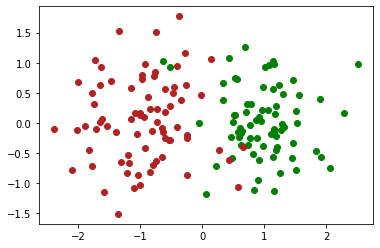

In [3]:
plt.scatter(x = df_train['x1'][df_train['target'] == 1], y = df_train['x2'][df_train['target'] == 1], c = 'green')
plt.scatter(x = df_train['x1'][df_train['target'] == 0], y = df_train['x2'][df_train['target'] == 0], c = 'firebrick')
plt.show()

### Classified

This function will simply calculate the dot product of x1 and x2 and their weights and adds the bias value to them then it will use the sign activation function to give the final y predict for each x1 and x2.

In [4]:
def classified(w_1, w_2, x_train, i, b):

    # print('misclassified:')
    # print(i, ' : ', w_1, w_2, b)

    x_1 = x_train['x1'][i]
    x_2 = x_train['x2'][i]

    y = (x_1 * w_1) + (x_2 * w_2) + b

    if y <= 0 :

        return 0

    else:

        return 1

### Error

This function will calculate the error of our model by comparing the predicted value with the actual value and adds 1 to "sum" if they were different and finally devides "sum" by the size of our data set. This function; however will return the fraction of data that were predicted incorrectly to get the fraction that were predicted correctly we need to subtract 1 from it.

In [5]:
def Error(x_train, w_1, w_2, n, b):

    # print('E_train:')
    # print(w_1, w_2, b)

    # print(n)

    sum = 0 
    temp = 0

    for j in range(n):

        temp = classified(w_1, w_2, x_train, j, b)

        if temp != x_train['target'][j]:

            sum += 1

    sum = sum / n

    return sum
        

### Pocket

This is the implementation of Pocket algorithm taught at class. The picture bellow demonstrates the psuedo code of this algorithm. The oly things added additionally were bias, alpha or learning rate and a covergence condition to stop our algorithm from training furthur if the error did not change or in other words no furthur convergence was to occure. 

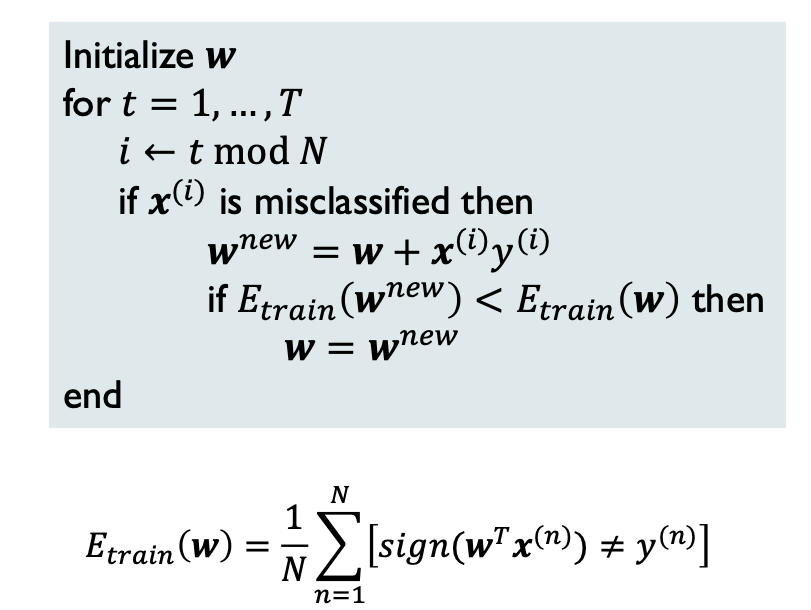

In [18]:
def Pocket(T, x_train, w_1, w_2, b, a):

    n = x_train.shape[0]

    w_1_new = 0
    w_2_new = 0
    b_new = 0

    count = 0
    helper = 0


    # print(n)

    # print('pocket:')
    # print(w_1, w_2, b)

    if count < 50:

        for t in range(T):

            i = t % n
            helper += 1
            count += 1

            y_p_i = classified(w_1, w_2, x_train, i, b)
            x_1 = x_train['x1'][i]
            x_2 = x_train['x2'][i]
            y_i = x_train['target'][i]

            # print('y_p_i: ', y_p_i, 'y_i', y_i)


            if (y_p_i != y_i):


                # print('y_p_i: ', y_p_i, 'y_i', y_i)

                w_1_new = w_1 + (a * (x_1 * y_i))

                # if y_i == 1:

                #     print('w_1_new: ', w_1_new)
                
                w_2_new = w_2 + (a * (x_2 * y_i))
                # print('w_2_new: ', w_2_new)
                b_new = b + (a * y_i) 
                # print('b_new: ', b_new)
                
                E_w_new = Error(x_train, w_1_new, w_2_new, n, b_new)
                E_w =  Error(x_train, w_1, w_2, n, b)

                # if y_i == 1:

                #     print('w_1_new: ', w_1_new)
                #     print('E_w_new: ', E_w_new)
                #     print('E_w: ', E_w)

                if E_w_new < E_w:

                    # print(E_w_new)
                    # print(E_w)

                    w_1 = w_1_new
                    w_2 = w_2_new
                    b = b_new

                    count = 0



    # print(1-E_w)

    return w_1, w_2, b, helper

### Training the model

Here we train the model on our training set for a total of 10 times with 2000 iterations and print the optimum weights and bias found, the error of the model with these parameters and the number of iterations to see if the model converges.

In [22]:
w1_list = []
w2_list = []
b_list = []
error_list = []
num_it_list = []

# w_1, w_2, b = Pocket(15, df_train, 0, 0, 0, a)

for i in range(10):

    w1 = np.random.uniform(0, 1)
    w2 = np.random.uniform(0, 1)
    bias = np.random.uniform(0, 0.5)
    a = 0.8

    w_1, w_2, b, num_it = Pocket(4000, df_train, w1, w2, bias, a)

    e = Error(df_train, w_1, w_2, 150, b) # len of the train data equals 150!
    # print(1-e)

    w1_list.append(w1)
    w2_list.append(w2)
    b_list.append(b)
    error_list.append(1-e)
    num_it_list.append(num_it)


print('w1_list: ', w1_list)
print('w2_list: ', w2_list)
print('b_list: ', b_list) 
print('error_list: ', error_list)
print('Number of iterations: ', num_it_list)

w1_list:  [0.218219913414757, 0.5357554995613651, 0.8423721852593298, 0.9383243355904849, 0.9370517162492484, 0.2638947526106019, 0.7217219406594997, 0.8861992853662075, 0.22295049727740923, 0.7824986605606384]
w2_list:  [0.8535486573156167, 0.2943005544997095, 0.4771806771299576, 0.5472929818445758, 0.5785436687161472, 0.40406609518184555, 0.7823427870120738, 0.07542660059002448, 0.1218456528854267, 0.4745575621119954]
b_list:  [0.8759548523087152, 0.17573493188687123, 0.264159279674023, 0.31963179152170446, 0.2424526590411144, 0.042989924250247225, 0.11985927232719679, 0.32042251091374313, 0.058823373567563064, 0.4031022627585446]
error_list:  [0.8066666666666666, 0.8866666666666667, 0.8866666666666667, 0.88, 0.8866666666666667, 0.8266666666666667, 0.8666666666666667, 0.8933333333333333, 0.9, 0.8266666666666667]
Number of iterations:  [4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000]


Conversion Definition:

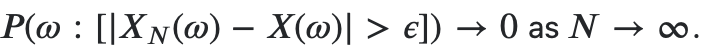

- Since we did not reach the optimum answer although we iterate 4000 times through the train set, it is obvous that our model is not a *strictly* converging model!! It does not achieves a state during training in which loss settles to within an error range around the final value. 
- It is obvious that our results are not good enough and I speculate that if we were to perform some pre-processing, we would get better results. 
- Worthy to mention that our training set is really small!
- One of my finds when playing with the algorithm was that if we replace the term w_i_new = w_i + (a * (x_i * y_i)) with w_i_new = w_i + (a * (x_i * (y_i - y_i_pred))) when updating the weights, we will get better results and our model can converge faster!

### Plotting the desicion boundry on the test set

Calculating the slope and intercept for each time we trained the model and got different weights and bias.

In [24]:
slope_list = []
intercept_list = []

for i in range(len(w1_list)):

    slope = - w2_list[i] / b_list[i]
    slope_list.append(slope)

    intercept = - w1_list[i] / w2_list[i]
    intercept_list.append(intercept)

print('slope_list', slope_list)
print('intercept_list', intercept_list)

slope_list [-0.9744208335235047, -1.6746844314889227, -1.8064126981221582, -1.712260783694328, -2.3862129250479347, -9.399088326598338, -6.527177846336345, -0.23539732079038952, -2.071381586870019, -1.1772634538552615]
intercept_list [-0.2556619491395507, -1.8204365957519595, -1.76531076305488, -1.714482675125838, -1.6196732708676436, -0.6530979851002815, -0.9225137019744281, -11.74916115049485, -1.8297780183184125, -1.6489014674598506]


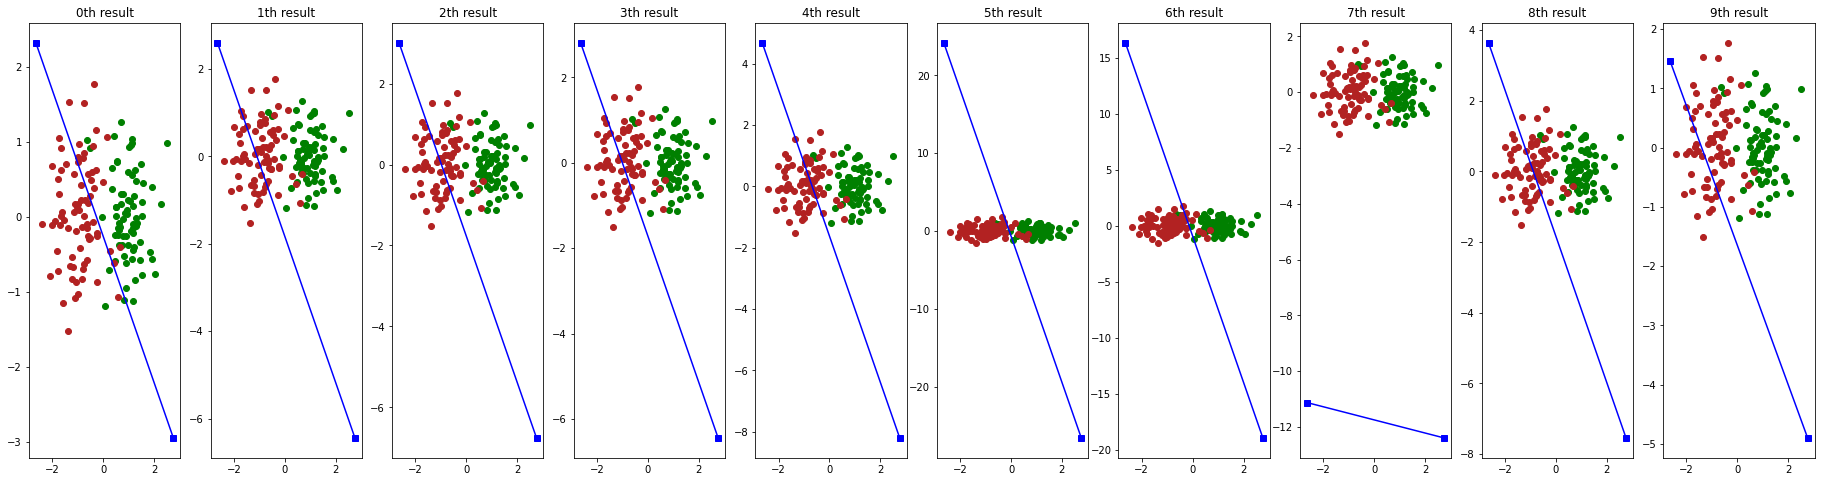

In [61]:
fig, ax = plt.subplots(ncols = 10, nrows = 1, figsize=(32, 8))


for i in range(len(w1_list)):
        
        s = ''
        s = str(i) + 'th result' 
        
        ax[i].scatter(x = df_train['x1'][df_train['target'] == 1], y = df_train['x2'][df_train['target'] == 1], c = 'green')
        ax[i].scatter(x = df_train['x1'][df_train['target'] == 0], y = df_train['x2'][df_train['target'] == 0], c = 'firebrick')
        ax[i].set_title(s)

        x1 = np.array(ax[i].get_xlim())
        x2 = intercept_list[i] + slope_list[i] * x1

        
        ax[i].plot(x1, x2, 'b-s')

plt.show()

###Reading the test set

In [8]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,x1,x2,target
0,-0.723805,0.798472,0.0
1,1.393432,-0.617441,1.0
2,1.018925,0.970799,1.0
3,0.934384,0.568916,1.0
4,1.218155,0.393373,1.0
5,-1.012060,0.429177,0.0
6,-1.375318,-0.260509,0.0
7,2.004957,0.238835,1.0
8,-1.329909,1.114648,0.0
9,-0.877216,-0.237935,0.0


###Plotting the test set

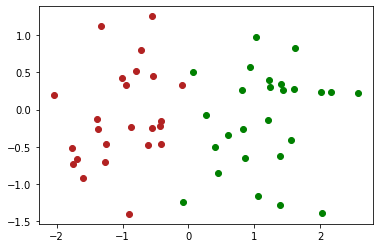

In [16]:
plt.scatter(x = df_test['x1'][df_test['target'] == 1], y = df_test['x2'][df_test['target'] == 1], c = 'green')
plt.scatter(x = df_test['x1'][df_test['target'] == 0], y = df_test['x2'][df_test['target'] == 0], c = 'firebrick')
plt.show()

###Evaluating the model on the test set

In [23]:
n = df_test.shape[0]
test_error_list = []

for i in range(len(w1_list)):

    e = Error(df_test, w1_list[i], w2_list[i], n, b_list[i])
    test_error_list.append(1-e)

print(test_error_list)

[0.6, 0.9, 0.9, 0.9, 0.9, 0.78, 0.84, 0.98, 0.94, 0.86]


### Plotting the desicion boundry on the test set

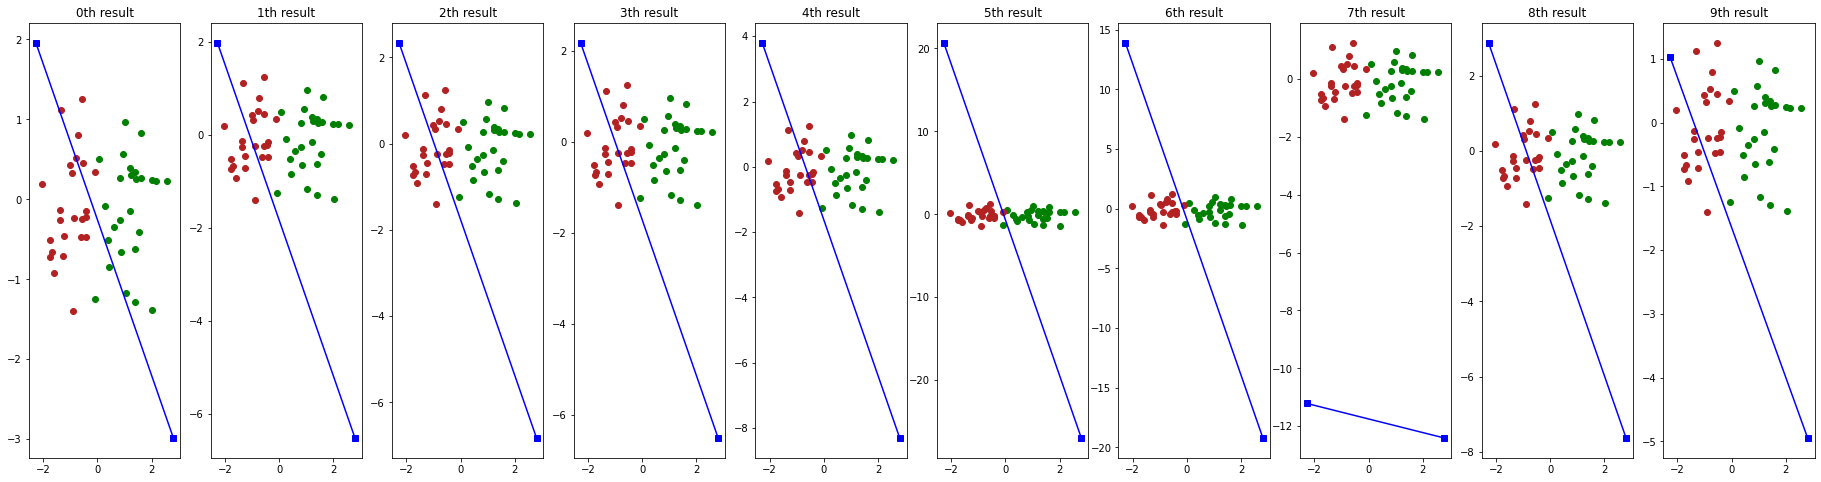

In [60]:
fig, ax = plt.subplots(ncols = 10, nrows = 1, figsize=(32, 8))


for i in range(len(w1_list)):
        
        s = ''
        s = str(i) + 'th result' 
        
        ax[i].scatter(x = df_test['x1'][df_test['target'] == 1], y = df_test['x2'][df_test['target'] == 1], c = 'green')
        ax[i].scatter(x = df_test['x1'][df_test['target'] == 0], y = df_test['x2'][df_test['target'] == 0], c = 'firebrick')
        ax[i].set_title(s)

        x1 = np.array(ax[i].get_xlim())
        x2 = intercept_list[i] + slope_list[i] * x1

        
        ax[i].plot(x1, x2, 'b-s')

plt.show()

In [63]:
# print('w1_list: ', w1_list)
# print('w2_list: ', w2_list)
# print('b_list: ', b_list) 
# print('error_list: ', error_list)
# print('test_error_list', test_error_list)

zipped = list(zip(w1_list, w2_list, b_list, error_list, test_error_list))
df = pd.DataFrame(zipped, columns = ['w1', 'w2', 'bias', 'training error', 'test error'])

df

,w1,w2,bias,training error,test error
0,0.218220,0.853549,0.875955,0.806667,0.60
1,0.535755,0.294301,0.175735,0.886667,0.90
2,0.842372,0.477181,0.264159,0.886667,0.90
3,0.938324,0.547293,0.319632,0.880000,0.90
4,0.937052,0.578544,0.242453,0.886667,0.90
5,0.263895,0.404066,0.042990,0.826667,0.78
6,0.721722,0.782343,0.119859,0.866667,0.84
7,0.886199,0.075427,0.320423,0.893333,0.98
8,0.222950,0.121846,0.058823,0.900000,0.94
9,0.782499,0.474558,0.403102,0.826667,0.86
